In [4]:
'''Project is divided into three parts:

loadData.py
Scraped Wiki's NIFTY50 page to get ticker symbols
Used Quandl API to fetch stock data for past 7 years

Preprocess.py
Label training data as 0(sell) and 1(buy)
Scale data using sklearn preprocessing library

Build_model.py
Build model in keras with LSTM layers.'''

"Project is divided into three parts:\n\nloadData.py\nScraped Wiki's NIFTY50 page to get ticker symbols\nUsed Quandl API to fetch stock data for past 5 years\n\nPreprocess.py\nLabel training data as 0(sell) and 1(buy)\nScale data using sklearn preprocessing libarary\n\nBuild_model.py\nBuild model in keras with LSTM layers."

In [5]:
import quandl
import os
import pandas as pd
import pickle
import bs4 as bs
import requests
from sklearn import preprocessing

In [6]:
os.chdir('/Users/subham/Desktop/NIFTY_50_STOCK_PREDICTION-master')

In [8]:
#To get API key create an account on Quandl website.Obtaining API Key lets you make more than 50 API calls in a day
quandl.ApiConfig.api_key='siHSwn8XE8V3_P8eybLi'

In [9]:
startdate="2014-04-22"
enddate="2020-04-19"

## Let's visualize the data by breaking it into steps

__The NIFTY 50 index National Stock Exchange of India's benchmark broad based stock market index for the Indian equity market. Full form of NIFTY is National Index Fifty. It represents the weighted average of 50 Indian company stocks in 13[1] sectors and is one of the two main stock indices used in India__

In [31]:
def nifty_50_list():
    resp = requests.get('https://en.wikipedia.org/wiki/NIFTY_50')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    print(f"soup:{soup}")

In [32]:
nifty_50_list()


soup:<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>NIFTY 50 - Wikipedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"XpwvMQpAEKAAAa6E@nsAAABB","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"NIFTY_50","wgTitle":"NIFTY 50","wgCurRevisionId":951465193,"wgRevisionId":951465193,"wgArticleId":1328813,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Use Indian English from June 2019","All Wikipedia articles written in Indian English","Use dmy dates from June 2019","Indian stock market indices","National Stock Exchange of India"],"wgPageC

## Print the tables extracted

In [33]:
def nifty_50_list():
    resp = requests.get('https://en.wikipedia.org/wiki/NIFTY_50')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    #Goto wiki page and do inspect element
    # Find all the table tags whose class is wikitable sortable, insie that there is 'tbody' tag
    # and extract all the data from there 
    table = soup.find('table', {'class': 'wikitable sortable'},'tbody')
    print(table)
nifty_50_list()   

<table class="wikitable sortable" id="constituents" style="font-size:85%">
<tbody><tr>
<th>Company Name</th>
<th>Symbol</th>
<th>Sector
</th></tr>
<tr>
<td><a href="/wiki/Adani_Ports_%26_SEZ" title="Adani Ports &amp; SEZ">Adani Ports</a></td>
<td>ADANIPORTS.NS</td>
<td>Infrastructure
</td></tr>
<tr>
<td><a href="/wiki/Asian_Paints" title="Asian Paints">Asian Paints</a></td>
<td>ASIANPAINT.NS</td>
<td>Consumer Goods
</td></tr>
<tr>
<td><a href="/wiki/Axis_Bank" title="Axis Bank">Axis Bank</a></td>
<td>AXISBANK.NS</td>
<td>Banking
</td></tr>
<tr>
<td><a href="/wiki/Bajaj_Auto" title="Bajaj Auto">Bajaj Auto</a></td>
<td>BAJAJ-AUTO.NS</td>
<td>Automobile
</td></tr>
<tr>
<td><a href="/wiki/Bajaj_Finance" title="Bajaj Finance">Bajaj Finance</a></td>
<td>BAJFINANCE.NS</td>
<td>Financial Services
</td></tr>
<tr>
<td><a href="/wiki/Bajaj_Finserv" title="Bajaj Finserv">Bajaj Finserv</a></td>
<td>BAJAJFINSV.NS</td>
<td>Financial Services
</td></tr>
<tr>
<td><a href="/wiki/Bharti_Airtel" title="Bh

## Getting the tickers

In [40]:
def nifty_50_list():
    resp = requests.get('https://en.wikipedia.org/wiki/NIFTY_50')
    soup = bs.BeautifulSoup(resp.text, 'lxml')
    #Goto wiki page and do inspect element
    # Find all the table tags whose class is wikitable sortable, insie that there is 'tbody' tag
    # and extract all the data from there 
    table = soup.find('table', {'class': 'wikitable sortable'},'tbody')

    tickers = []
    for row in table.findAll('tr')[1:]: # 0th <tr> tag contains Company,Sysmbol,Sector.. Not needed
        ticker = row.findAll('td')[1].text  #First <td> tag data
        print(ticker.split('.')[0])
nifty_50_list()   

ADANIPORTS
ASIANPAINT
AXISBANK
BAJAJ-AUTO
BAJFINANCE
BAJAJFINSV
BHARTIARTL
INFRATEL
BPCL
BRITANNIA
CIPLA
COALINDIA
DRREDDY
EICHERMOT
GAIL
GRASIM
HCLTECH
HDFC
HDFCBANK
HEROMOTOCO
HINDALCO
HINDUNILVR
ICICIBANK
INDUSINDBK
INFY
IOC
ITC
JSWSTEEL
KOTAKBANK
LT
M&M
MARUTI
NESTLEIND
NTPC
ONGC
POWERGRID
RELIANCE
SHREECEM
SBIN
SUNPHARMA
TCS
TATAMOTORS
TATASTEEL
TECHM
TITAN
ULTRACEMCO
UPL
VEDL
WIPRO
ZEEL


# Let's move forward and store all the tickers

In [10]:
def nifty_50_list():
    resp = requests.get('https://en.wikipedia.org/wiki/NIFTY_50')
    soup = bs.BeautifulSoup(resp.text, 'lxml')

    table = soup.find('table', {'class': 'wikitable sortable'},'tbody')

    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[1].text
        # print(f"ticker{ticker}")
        tickers.append(ticker.split('.')[0])

    with open("nifty50_list.pickle","wb") as f:
        pickle.dump(tickers,f)
    
    #Adding it manually since ticker name obtained from Wikipedia contains a hypen whereas quandl code expects an underscore
    tickers = list(map(lambda x: x.replace("BAJAJ-AUTO","BAJAJ_AUTO"), tickers))
    #Adding it manually since quandl code is different than the ticker symbol obtained from Wiki which is M&M
    tickers = list(map(lambda x: x.replace("M&M","MM"), tickers))
    #Fetching data for NIFTY50 index whose price we want to PREDICT
    tickers.append('NIFTY_50')
    # We will remove below ones since data ins't available
    tickers.remove('VEDL')
    tickers.remove('UPL')
#     tickers.remove('IBULHSGFIN')
    return tickers

## Function to scrap NIFTY50 list from WIKI only if not already obtained



In [11]:
#function to scrap NIFTY50 list from WIKI only if not already obtained
def get_nifty50_list(scrap=False):
    if scrap:
        tickers=nifty_50_list()
    else:
        with open("nifty50_list.pickle","rb") as f:
            tickers=pickle.load(f)
    return tickers

## Function to fetch stock prices from Quandl and then storing them in csv to avoid making duplicate calls to Quandl API



In [12]:
#function to fetch stock prices from Quandl and then storing them to avoid making duplicate calls to Quandl API

def getStockdataFromQuandl(ticker):
    quandl_code="NSE/"+ticker
    try:
        if not os.path.exists(f'stock_data/{ticker}.csv'):
          data=quandl.get(quandl_code,start_date=startdate,end_date=enddate)
          data.to_csv(f'stock_data/{ticker}.csv')
        else:
            print(f"stock data for {ticker} already exists")
    except quandl.errors.quandl_error.NotFoundError as e:
        print(ticker)
        print(str(e))

### Try this code to get stock prices  from Quandl

In [20]:
#getStockdataFromQuandl('INFY')

### We will make a dataframe containing only Closing stock and Volume(Total Trade Quantity)

In [13]:
def load():
    tickers=get_nifty50_list(True)
    df=pd.DataFrame()
    for ticker in tickers:
        getStockdataFromQuandl(ticker) # Store them in csv
        try:
            data=pd.read_csv(f'stock_data/{ticker}.csv')
            
            # Due to column name mismatches we are renaming it from stock_data/...csv to our dataframe
            if(ticker == "NIFTY_50"):
                data.rename(columns={'Close':f"{ticker}_Close",'Shares Traded':f"{ticker}_Volume"},inplace=True)
            else:
                data.rename(columns={'Close':f"{ticker}_Close",'Total Trade Quantity':f"{ticker}_Volume"},inplace=True)
            
            df=pd.concat([df,data[f'{ticker}_Volume'],data[f'{ticker}_Close']],axis=1)
        except Exception as e:
            print(f"couldn't find {ticker}")
            print(str(e))
    df.to_csv('nifty50_closingprices.csv')
    df.dropna(inplace=True)
    return df

In [51]:
load()

stock data for ADANIPORTS already exists
stock data for ASIANPAINT already exists
stock data for AXISBANK already exists
stock data for BAJAJ_AUTO already exists
stock data for BAJFINANCE already exists
stock data for BAJAJFINSV already exists
stock data for BHARTIARTL already exists
stock data for INFRATEL already exists
stock data for BPCL already exists
stock data for BRITANNIA already exists
stock data for CIPLA already exists
stock data for COALINDIA already exists
stock data for DRREDDY already exists
stock data for EICHERMOT already exists
stock data for GAIL already exists
stock data for GRASIM already exists
stock data for HCLTECH already exists
stock data for HDFC already exists
stock data for HDFCBANK already exists
stock data for HEROMOTOCO already exists
stock data for HINDALCO already exists
stock data for HINDUNILVR already exists
stock data for ICICIBANK already exists
stock data for INDUSINDBK already exists
stock data for INFY already exists
stock data for IOC already

,ADANIPORTS_Volume,ADANIPORTS_Close,ASIANPAINT_Volume,ASIANPAINT_Close,AXISBANK_Volume,AXISBANK_Close,BAJAJ_AUTO_Volume,BAJAJ_AUTO_Close,BAJFINANCE_Volume,BAJFINANCE_Close,...,TITAN_Volume,TITAN_Close,ULTRACEMCO_Volume,ULTRACEMCO_Close,WIPRO_Volume,WIPRO_Close,ZEEL_Volume,ZEEL_Close,NIFTY_50_Volume,NIFTY_50_Close
0,7284821.0,204.00,1250718.0,539.20,1132035.0,1503.80,161232.0,2014.15,70161.0,1768.95,...,785424.0,259.45,112577.0,2219.25,5708980.0,546.20,1589176.0,267.25,111840313.0,6817.65
1,3848936.0,204.80,405176.0,536.40,994573.0,1500.10,179445.0,2003.35,165329.0,1765.15,...,931899.0,261.25,159728.0,2202.10,4252307.0,530.55,1682482.0,260.90,114693049.0,6815.35
2,7702502.0,204.45,866527.0,529.60,1633806.0,1519.80,362968.0,2004.65,50048.0,1826.75,...,3942894.0,255.00,340327.0,2169.70,4505036.0,524.70,1457955.0,265.75,182972972.0,6840.80
3,5808334.0,198.70,512656.0,514.95,2457432.0,1532.70,404437.0,1996.05,22664.0,1813.00,...,724290.0,258.20,369536.0,2079.60,3071291.0,519.25,2029693.0,268.95,154320793.0,6782.75
4,6111039.0,192.15,1434257.0,500.55,1773777.0,1529.55,356855.0,1985.00,19005.0,1856.80,...,400140.0,258.30,246765.0,2050.75,3187852.0,529.60,1753759.0,269.45,118162668.0,6761.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1153,10909545.0,361.10,2098064.0,1388.20,10715457.0,620.85,386367.0,2808.45,3042464.0,2591.25,...,2972085.0,900.05,390384.0,3984.30,9828513.0,322.10,5119793.0,447.80,186494657.0,10862.55
1154,2268806.0,361.10,1649577.0,1357.05,6191605.0,615.00,348337.0,2724.65,1050017.0,2564.90,...,2554749.0,879.85,322548.0,3917.15,4231888.0,326.70,4194897.0,436.75,159404542.0,10910.10
1155,4519020.0,376.55,1790087.0,1363.00,6519211.0,619.50,410582.0,2734.60,1662068.0,2567.40,...,3840772.0,889.15,224353.0,3996.10,2355520.0,326.15,9222938.0,455.05,309665939.0,10792.50
1156,5043675.0,384.00,2174090.0,1372.50,12304812.0,617.55,558049.0,2737.00,1626301.0,2587.15,...,2160188.0,887.65,255449.0,3982.50,5072651.0,327.45,5809491.0,464.40,286241745.0,10672.25


__nifty50_closingprices.csv is the above dataframe__

# Let's preprocess our data

- #SERIES_LENGTH : We are going to club the data in 30 days brackets. eg. day1-day30, day2-day31, day3-day32.. so on.. using this data we will predict the future Data
- #PREDICT_LENGTH ; From today what will be prediction after 7 days


In [19]:
#how many days data will be used to create series to train RNN
SERIES_LENGTH=30
PREDICT_LENGTH=7


In [20]:
TICKER="NIFTY_50"

In [21]:
def normalize_data(df):
    pass#implement it if you want to use different techniques for normalizing and scaling

In [22]:
def scale_data(df):
    for column in df.columns:
        df[column] = preprocessing.scale(df[column].values)
    return df

- df["nifty_future_price"] : This will contain data of df["NIFTY_50_Close"] after 7 days.
- say, df["NIFTY_50_Close"] is from day1-day7, then df["nifty_future_price"] will have data from day8-day14 so on
- This is done to generate sequential data, so that it has some dependency on its past data
- Like this we will get NaNs at the end of df["nifty_future_price"] , do we will delete them

In [23]:
import numpy as np
def process_data(df):
    df["nifty_future_price"]=df[f"{TICKER}_Close"].shift(-PREDICT_LENGTH) # Shift it by 7 days

    #Dropping any Nan values
    df.dropna(inplace=True)

    df["Label"]=np.where(df["nifty_future_price"]>=df["NIFTY_50_Close"],1,0)
    #print(f"df with future column {df[:5]}")
    #dropping 'nifty_future_price'  columns as it is no longer required
    df.drop('nifty_future_price',1,inplace=True) # must be dropped
    df.to_csv('nifty50_future_label.csv')

    sequence=[]
    # We want to scale the data except the label part since it is already 0 and 1
    temp=df.loc[:, df.columns != 'Label']
    temp=scale_data(temp)
    # print(f"temp{temp[:30]}")
    for i in range (len(temp)-SERIES_LENGTH):
       sequence.append([np.array(temp[i:i+SERIES_LENGTH]),df.iloc[i+SERIES_LENGTH,-1]]) # iloc part is to take last column data i.e. labels

    np.random.shuffle(sequence)

    #Now we will count the sells and buys to balance the data
    # Algorithm : whichever count is less, we will take up the data upto that
    X=[]
    y=[]
    buy=[]
    sell=[]
    for seq ,label in sequence:
        if label == 0:
            sell.append([seq,label])
        else:
            buy.append([seq,label])
            
    # print(f"buy :{buy[:10]}")
    # print(f"sell :{sell[:10]}")
    
    buys=len(buy)
    sells=len(sell)
    print(f"original buys:{buys} original sells:{sells}")
    if(buys<sells):
        buy=buy[:buys]
        sell=sell[:buys]
    else:
        buy=buy[:sells]
        sell=sell[:sells]

    print(f"buys:{len(buy)} sells:{len(sell)}")
    # Concat the buys an sells and shuffle it out again
    sequence=buy+sell

    np.random.shuffle(sequence)


    for seq ,label in sequence:
        X.append(seq)
        y.append(label)

    return np.array(X),np.array(y)



In [63]:
df=load()

stock data for ADANIPORTS already exists
stock data for ASIANPAINT already exists
stock data for AXISBANK already exists
stock data for BAJAJ_AUTO already exists
stock data for BAJFINANCE already exists
stock data for BAJAJFINSV already exists
stock data for BHARTIARTL already exists
stock data for INFRATEL already exists
stock data for BPCL already exists
stock data for BRITANNIA already exists
stock data for CIPLA already exists
stock data for COALINDIA already exists
stock data for DRREDDY already exists
stock data for EICHERMOT already exists
stock data for GAIL already exists
stock data for GRASIM already exists
stock data for HCLTECH already exists
stock data for HDFC already exists
stock data for HDFCBANK already exists
stock data for HEROMOTOCO already exists
stock data for HINDALCO already exists
stock data for HINDUNILVR already exists
stock data for ICICIBANK already exists
stock data for INDUSINDBK already exists
stock data for INFY already exists
stock data for IOC already

In [65]:
df.shape

(1130, 99)

In [66]:
# This needs to be balanced .
# Done in process_data(df)
df['Label'].value_counts()

1    664
0    466
Name: Label, dtype: int64

In [68]:
process_data(df)

df with future column    ADANIPORTS_Volume  ADANIPORTS_Close  ASIANPAINT_Volume  ASIANPAINT_Close  \
0          7284821.0            204.00          1250718.0            539.20   
1          3848936.0            204.80           405176.0            536.40   
2          7702502.0            204.45           866527.0            529.60   
3          5808334.0            198.70           512656.0            514.95   
4          6111039.0            192.15          1434257.0            500.55   

   AXISBANK_Volume  AXISBANK_Close  BAJAJ_AUTO_Volume  BAJAJ_AUTO_Close  \
0        1132035.0         1503.80           161232.0           2014.15   
1         994573.0         1500.10           179445.0           2003.35   
2        1633806.0         1519.80           362968.0           2004.65   
3        2457432.0         1532.70           404437.0           1996.05   
4        1773777.0         1529.55           356855.0           1985.00   

   BAJFINANCE_Volume  BAJFINANCE_Close  ...  ULTRACE

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a 

original buys:639 original sells:454
buys:454 sells:454


(array([[[-5.24097954e-01,  1.40052998e+00, -1.00416507e+00, ...,
           1.40143543e+00, -7.66044428e-01,  1.30650346e+00],
         [-1.53912437e-01,  1.43836602e+00, -3.84314167e-01, ...,
           1.48048897e+00, -5.40864715e-01,  1.33896468e+00],
         [ 1.69608595e-01,  1.43284826e+00, -6.77338948e-01, ...,
           1.53910691e+00, -4.12124951e-01,  1.30460637e+00],
         ...,
         [-8.03831433e-01,  1.81987939e+00,  1.12359028e-02, ...,
           1.62084935e+00,  1.48109438e+00,  1.74822907e+00],
         [ 1.37137606e-01,  1.64961722e+00, -3.12201270e-01, ...,
           1.52566243e+00,  1.16461926e+00,  1.53213005e+00],
         [-3.46912298e-01,  1.49590832e+00,  2.35508745e-01, ...,
           1.48909344e+00,  5.92462789e-01,  1.45283192e+00]],
 
        [[-4.95402915e-01,  1.51940774e-01, -8.49216243e-02, ...,
          -5.61996532e-01, -7.99137855e-01, -9.73117725e-01],
         [-5.16119301e-01,  2.62295881e-01,  2.80532864e-02, ...,
          -5.27578661

## Observation:

### We will use sell=0 and buy=1 as labels
- if df["nifty_future_price"] > df["NIFTY_50_Close"]===> then buy(1)
- if df["nifty_future_price"] < df["NIFTY_50_Close"] ===> then sell(0)

## Modelling

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,LSTM,BatchNormalization,Conv1D,MaxPooling1D
import matplotlib.pyplot as plt
from sklearn import preprocessing
import pandas as pd

In [14]:
df=load()

stock data for ADANIPORTS already exists
stock data for ASIANPAINT already exists
stock data for AXISBANK already exists
stock data for BAJAJ_AUTO already exists
stock data for BAJFINANCE already exists
stock data for BAJAJFINSV already exists
stock data for BHARTIARTL already exists
stock data for INFRATEL already exists
stock data for BPCL already exists
stock data for BRITANNIA already exists
stock data for CIPLA already exists
stock data for COALINDIA already exists
stock data for DRREDDY already exists
stock data for EICHERMOT already exists
stock data for GAIL already exists
stock data for GRASIM already exists
stock data for HCLTECH already exists
stock data for HDFC already exists
stock data for HDFCBANK already exists
stock data for HEROMOTOCO already exists
stock data for HINDALCO already exists
stock data for HINDUNILVR already exists
stock data for ICICIBANK already exists
stock data for INDUSINDBK already exists
stock data for INFY already exists
stock data for IOC already

In [15]:
training_size=0.8

In [16]:
spilt_point=int(training_size*len(df))

In [17]:
#splitting data for training and testing in ratio 80:20
train_df=df[:spilt_point]
test_df=df[spilt_point:]

In [130]:
print(f"train_df {train_df[:5]}")
print("="*100)
print(f"test_df {test_df[:5]}")

train_df    ADANIPORTS_Volume  ADANIPORTS_Close  ASIANPAINT_Volume  ASIANPAINT_Close  \
0          7284821.0            204.00          1250718.0            539.20   
1          3848936.0            204.80           405176.0            536.40   
2          7702502.0            204.45           866527.0            529.60   
3          5808334.0            198.70           512656.0            514.95   
4          6111039.0            192.15          1434257.0            500.55   

   AXISBANK_Volume  AXISBANK_Close  BAJAJ_AUTO_Volume  BAJAJ_AUTO_Close  \
0        1132035.0         1503.80           161232.0           2014.15   
1         994573.0         1500.10           179445.0           2003.35   
2        1633806.0         1519.80           362968.0           2004.65   
3        2457432.0         1532.70           404437.0           1996.05   
4        1773777.0         1529.55           356855.0           1985.00   

   BAJFINANCE_Volume  BAJFINANCE_Close  ...  TITAN_Volume  TITAN_

In [131]:
import warnings
warnings.filterwarnings("ignore")

train_x,train_y=process_data(train_df)

test_x,test_y=process_data(test_df)

df with future column    ADANIPORTS_Volume  ADANIPORTS_Close  ASIANPAINT_Volume  ASIANPAINT_Close  \
0          7284821.0            204.00          1250718.0            539.20   
1          3848936.0            204.80           405176.0            536.40   
2          7702502.0            204.45           866527.0            529.60   
3          5808334.0            198.70           512656.0            514.95   
4          6111039.0            192.15          1434257.0            500.55   

   AXISBANK_Volume  AXISBANK_Close  BAJAJ_AUTO_Volume  BAJAJ_AUTO_Close  \
0        1132035.0         1503.80           161232.0           2014.15   
1         994573.0         1500.10           179445.0           2003.35   
2        1633806.0         1519.80           362968.0           2004.65   
3        2457432.0         1532.70           404437.0           1996.05   
4        1773777.0         1529.55           356855.0           1985.00   

   BAJFINANCE_Volume  BAJFINANCE_Close  ...  ULTRACE

In [169]:
print('X_train :',train_x.shape)
print('y_train :',train_y.shape)
print('X_test :',test_x.shape)
print('y_test :',test_y.shape)

X_train : (722, 30, 98)
y_train : (722,)
X_test : (152, 30, 98)
y_test : (152,)


In [181]:
NAME="NIFTY50PRED"
BATCH_SIZE=64
EPOCHS=15

In [151]:
to_categorical([0,1])

array([[1., 0.],
       [0., 1.]], dtype=float32)

In [48]:
from keras.utils import plot_model

def build_model():

    model=Sequential()
    model.add(LSTM(256,input_shape=(train_x.shape[1:]),return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(LSTM(256,return_sequences=True))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(LSTM(256,return_sequences=False))
    model.add(Dropout(0.2))
    model.add(BatchNormalization())

    model.add(Dense(32,activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation='sigmoid'))


    model.compile(loss='binary_crossentropy',optimizer="adam",metrics=['accuracy'])


    history=model.fit(train_x,train_y,batch_size=BATCH_SIZE,epochs=EPOCHS,validation_data=(test_x,test_y))
    score=model.evaluate(test_x,test_y)
    print("Validation accuracy percentage",score[1]*100)
    print("Validation loss percentage",score[0]*100)
    return model

In [183]:
model = build_model()

Train on 722 samples, validate on 152 samples
Epoch 1/15
722/722 [==============================] - 14s 20ms/sample - loss: 0.7826 - accuracy: 0.5776 - val_loss: 0.6619 - val_accuracy: 0.5987
Epoch 2/15
722/722 [==============================] - 7s 9ms/sample - loss: 0.6863 - accuracy: 0.6080 - val_loss: 0.6538 - val_accuracy: 0.6316
Epoch 3/15
722/722 [==============================] - 7s 10ms/sample - loss: 0.6368 - accuracy: 0.6496 - val_loss: 0.6423 - val_accuracy: 0.6513
Epoch 4/15
722/722 [==============================] - 8s 11ms/sample - loss: 0.6204 - accuracy: 0.6565 - val_loss: 0.6448 - val_accuracy: 0.6316
Epoch 5/15
722/722 [==============================] - 8s 11ms/sample - loss: 0.6148 - accuracy: 0.6551 - val_loss: 0.6389 - val_accuracy: 0.6250
Epoch 6/15
722/722 [==============================] - 7s 10ms/sample - loss: 0.5871 - accuracy: 0.6911 - val_loss: 0.6395 - val_accuracy: 0.6645
Epoch 7/15
722/722 [==============================] - 8s 12ms/sample - loss: 0.5708 

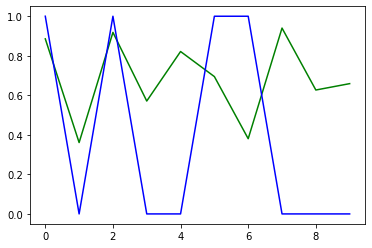

In [184]:
prediction=model.predict(test_x)
plt.plot(prediction[40:50],color='green',label='predicted_data')
plt.plot(test_y[40:50],color='blue',label='actual_data')

plt.show()